# Portfolio Part 4: Analysis of ATO Taxation records sorted by postcode Dataset

This notebook will analyse an ATO dataset full of tax and income details, exploring patterns in income, deductions, rent, and business activity across different postcodes. The goal is to get a clearer picture of how income and financial behaviors vary between different areas. I will use a mix of data analysis techniques to uncover trends and figure out which factors have the most influence on financial outcomes.

### Techniques and Methodology

1. Exploratory Data Analysis: I will start by exploring the data, identifying relationships between income, deductions, rent, and other financial metrics. This includes cleaning the data and handling any missing values to ensure accuracy.

2. Clustering with K means: To uncover different types of financial groups, I will apply K-means clustering to categorize postcodes based on their income levels, business activity, and deductions.

3. Machine Learning: I will use linear regression to predict total income based on various socio-economic features, and then apply RFE to refine the model.

4. Visualization: Multiple different visualizations will be used to showcase key insights and analysis.

### The Main Questions:

The key questions that will be answered by the end of this analysis will be:

1. How many different groups of postcodes can be identified based on income, deductions, and other financial metrics?

2. What factors most influence financial outcomes such as taxable income, total income, and deductions?

In [679]:
#import all necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

#read data and print the first few rows:
data = pd.read_csv('/Users/hatimhussaini/Downloads/Github Repository/portfolio-part-4-hatimhussaini/postcode_data.csv')
data.head()

Postcode  Number of individuals lodging an income tax return  \
0       800                                               5469    
1       810                                              21199    
2       812                                              11330    
3       820                                              12940    
4       822                                               5981    

   Count taxable income or loss  Average taxable income or loss  \
0                          5469                           75120   
1                         21199                           64240   
2                         11330                           62800   
3                         12940                           78787   
4                          5981                           46457   

   Median taxable income or loss  Proportion with salary or wages  \
0                          54381                             0.93   
1                          54207                             0.87   
2                          55061                             0.88   
3                          61759                             0.89   
4                          34654                             0.93   

   Count salary or wages  Average salary or wages  Median salary or wages  \
0                   5109                    76663                   57618   
1                  18481                    66038                   58351   
2                   9967                    65689                   59653   
3                  11482                    75917                   64902   
4                   5549                    44601                   33787   

   Proportion with net rent  ...  Count total business expenses  \
0                      0.15  ...                            214   
1                      0.20  ...                           1667   
2                      0.20  ...                            766   
3                      0.24  ...                            898   
4                      0.11  ...                            222   

   Average total business expenses  Median total business expenses  \
0                            53482                           11214   
1                            66482                           13476   
2                            54295                           15664   
3                            53516                           13038   
4                            59281                           20346   

   Proportion with net tax  Count net tax  Average net tax  Median net tax  \
0                     0.84           4609            23516           12699   
1                     0.81          17167            18229           12929   
2                     0.83           9350            16847           12805   
3                     0.85          10994            24297           14956   
4                     0.67           3985            12326            7308   

   Count total super member accounts balance  \
0                                       7321   
1                                      24913   
2                                      13588   
3                                      15704   
4                                       9155   

   Average total super member accounts balance  \
0                                        71340   
1                                       111650   
2                                       116002   
3                                       134488   
4                                        44426   

   Median total super member accounts balance  
0                                       12484  
1                                       39517  
2                                       47640  
3                                       44118  
4                                        9277  

[5 rows x 34 columns]

In [574]:
#get info about data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Postcode                                            2472 non-null   int64  
 1   Number of individuals lodging an income tax return  2472 non-null   int64  
 2   Count taxable income or loss                        2472 non-null   int64  
 3   Average taxable income or loss                      2472 non-null   int64  
 4   Median taxable income or loss                       2472 non-null   int64  
 5   Proportion with salary or wages                     2472 non-null   float64
 6   Count salary or wages                               2472 non-null   int64  
 7   Average salary or wages                             2472 non-null   int64  
 8   Median salary or wages                              2472 non-null   int64  
 9

All the columns in the dataset are numerical thus we do not need to conduct One-Hot Encoding on this dataset to convert catagorical values to numerical for easier comaprisions.


In [329]:
#summary statistics to understand distributions
print(data.describe())

         User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.00000                700.000000                  700.000000   
mean   350.50000                271.128571                    5.272714   
std    202.21688                177.199484                    3.068584   
min      1.00000                 30.000000                    1.000000   
25%    175.75000                113.250000                    2.500000   
50%    350.50000                227.500000                    4.900000   
75%    525.25000                434.250000                    7.400000   
max    700.00000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               700.000000                700.000000           700.000000   
mean               1525.158571                 50.681429           929.742857   
std                 819.136414                 26.943324           640.451729   
min      

In [580]:
#check for missing values in each column
print(data.isnull().sum())

Postcode                                              0
Number of individuals lodging an income tax return    0
Count taxable income or loss                          0
Average taxable income or loss                        0
Median taxable income or loss                         0
Proportion with salary or wages                       0
Count salary or wages                                 0
Average salary or wages                               0
Median salary or wages                                0
Proportion with net rent                              0
Count net rent                                        0
Average net rent                                      0
Median net rent                                       0
Count total income or loss                            0
Average total income or loss                          0
Median total income or loss                           0
Count total deductions                                0
Average total deductions                        

The sum of null values in each column is 0 which means that there is no data cleaning or imputing to be done


#### Univariate and Bivariate Visualisations:

To understand the nuances and of the data and the relationships of a column to another, we will do some pre visualisations.

##### Histogram for Average salary or wages:

Text(0, 0.5, 'Frequency')

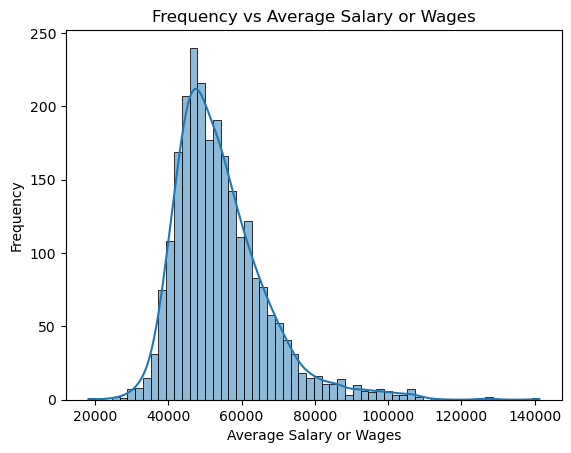

In [589]:
sns.histplot(data['Average salary or wages'], kde=True)
plt.title('Frequency vs Average Salary or Wages')
plt.xlabel('Average Salary or Wages')
plt.ylabel('Frequency')

This plot shows the distribution of average salary or wages across individuals, indicating how common different income levels are. The kde line helps visualize the underlying probability density, providing a smoother view of income frequency. We can notice that the income is slightly left skewed with the lowest value at 20000 aud (lowest tax eligible income in Australia) and Mode at 50000 aud and the highest value at 140,000 aud.

##### Bar plot for Average salary or wages grouped by Postcodes (sub sample)

Text(0, 0.5, 'Average Salary or Wages')

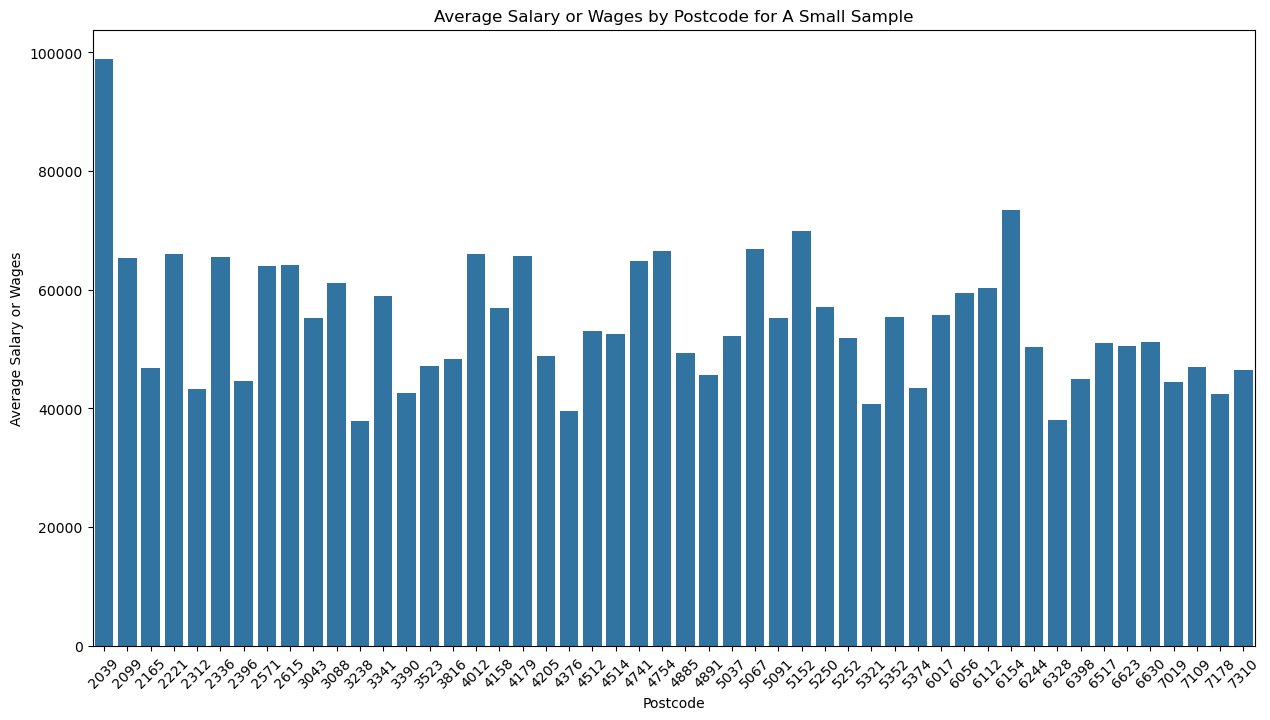

In [615]:
subset_data = data.sample(50)
plt.figure(figsize=(15, 8))
sns.barplot(x='Postcode', y='Average salary or wages', data=subset_data)
plt.xticks(rotation=45)
plt.title('Average Salary or Wages by Postcode for A Small Sample')
plt.xlabel('Postcode')
plt.ylabel('Average Salary or Wages')

To visualize the bar plot effectively, I used a random sample of 50 postcodes to avoid overcrowding, given the large number of postcodes in the dataset. It shows the average salary for each postcode to help with comparing differences in income parity in different neighbourhoods. 

##### Scatter plot comparing Avg salary against avg total income and coloured by proportion people earning a salary in a postcode

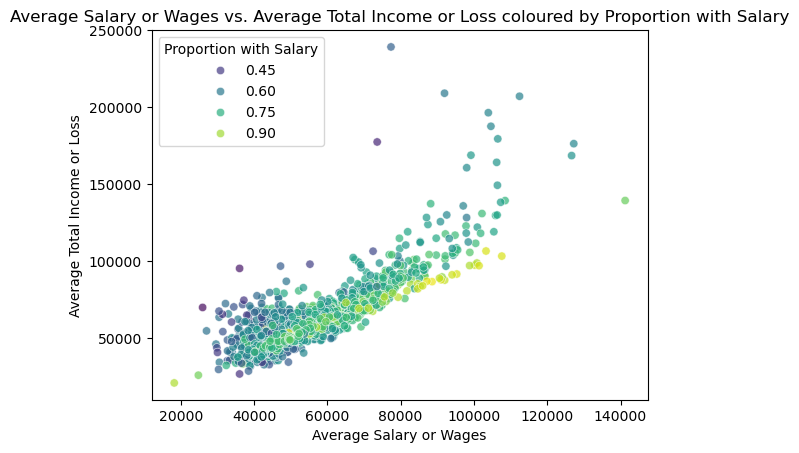

In [812]:
sns.scatterplot(x='Average salary or wages', y='Average total income or loss', hue='Proportion with salary or wages',
    data=data,
    alpha=0.7,
    palette='viridis')
plt.title('Average Salary or Wages vs. Average Total Income or Loss coloured by Proportion with Salary')
plt.xlabel('Average Salary or Wages')
plt.ylabel('Average Total Income or Loss')
plt.legend(title='Proportion with Salary')

The scatter plot shows that as average salary goes up, total income also rises as expected. Furthermore, the greener points tell us that areas with more people on a salary tend to have higher overall income levels.

##### Scatter plot of Avg taxable income against avg tax deductions

Text(0, 0.5, 'Average Total Deductions')

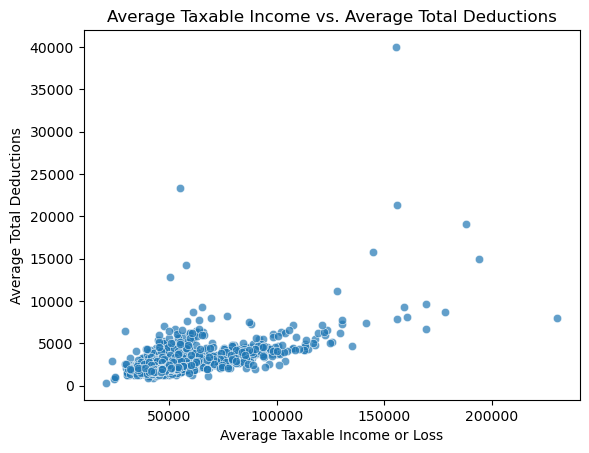

In [819]:
sns.scatterplot(x='Average taxable income or loss', y='Average total deductions', data=data, alpha=0.7)
plt.title('Average Taxable Income vs. Average Total Deductions')
plt.xlabel('Average Taxable Income or Loss')
plt.ylabel('Average Total Deductions')

This scatter plot shows the relationship between average taxable income and average total deductions.
It reveals how deductions relate to income levels, potentially indicating differences in financial strategies across the dataset.

##### Hexbin plot for Average Salary or Wages against Average Net Rent

Text(0, 0.5, 'Average Net Rent')

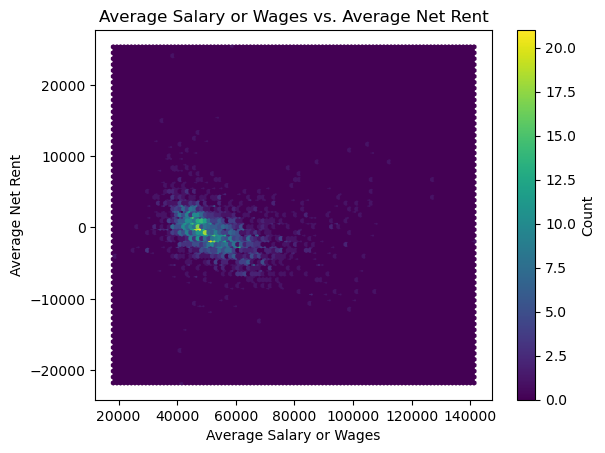

In [659]:
plt.hexbin(data['Average salary or wages'], data['Average net rent'])
plt.colorbar(label='Count')
plt.title('Average Salary or Wages vs. Average Net Rent')
plt.xlabel('Average Salary or Wages')
plt.ylabel('Average Net Rent')

This hexbin plot shows the density of points between average salary and average net rent. It helps us visualize regions with higher concentrations of data points, indicating how salaries relate to rent levels across the dataset.

##### Data Scaling to divide the data into clusters:

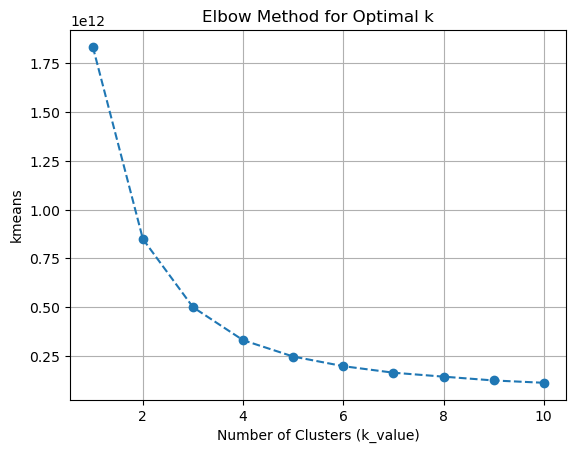

In [825]:
# a few major features selected to help with the clustering.
selected_features = [
    'Average taxable income or loss',
    'Average salary or wages',
    'Average total income or loss',
    'Proportion with salary or wages',
    'Average total deductions'
]
x = data[selected_features]
plot_points = []
k_values = range(1, 11)# optimal number of clusters in the range of 1 - 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=142)
    kmeans.fit(x) 
    plot_points.append(kmeans.inertia_)

# Plot the curve using the elbow method
plt.plot(k_values, plot_points, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k_value)')
plt.ylabel('kmeans')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

From observing the elbow curve above, I can deduce that 4 clusters is the best option to divide
our data into.

In [829]:
kmeans = KMeans(n_clusters=4, random_state=142)
data['Cluster'] = kmeans.fit_predict(x) # add a cluster column to the data

print(data.head())

   Postcode  Number of individuals lodging an income tax return  \
0       800                                               5469    
1       810                                              21199    
2       812                                              11330    
3       820                                              12940    
4       822                                               5981    

   Count taxable income or loss  Average taxable income or loss  \
0                          5469                           75120   
1                         21199                           64240   
2                         11330                           62800   
3                         12940                           78787   
4                          5981                           46457   

   Median taxable income or loss  Proportion with salary or wages  \
0                          54381                             0.93   
1                          54207                        

##### Scatter plot to visualise the different clusters/ groups in our data

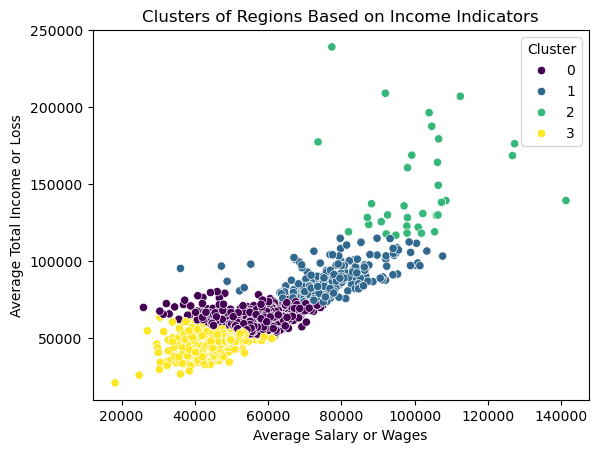

In [665]:
sns.scatterplot(x='Average salary or wages', y='Average total income or loss', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters of Regions Based on Income Indicators')
plt.xlabel('Average Salary or Wages')
plt.ylabel('Average Total Income or Loss')
plt.legend(title='Cluster')

The scatterplot shows 4 distinct clusters based on avg income and avg salary. We could classify these clusters as lower class, lower-middle class, higher-middle class and high class income groups.

#### Linear regression to predict Total Income

<Axes: >

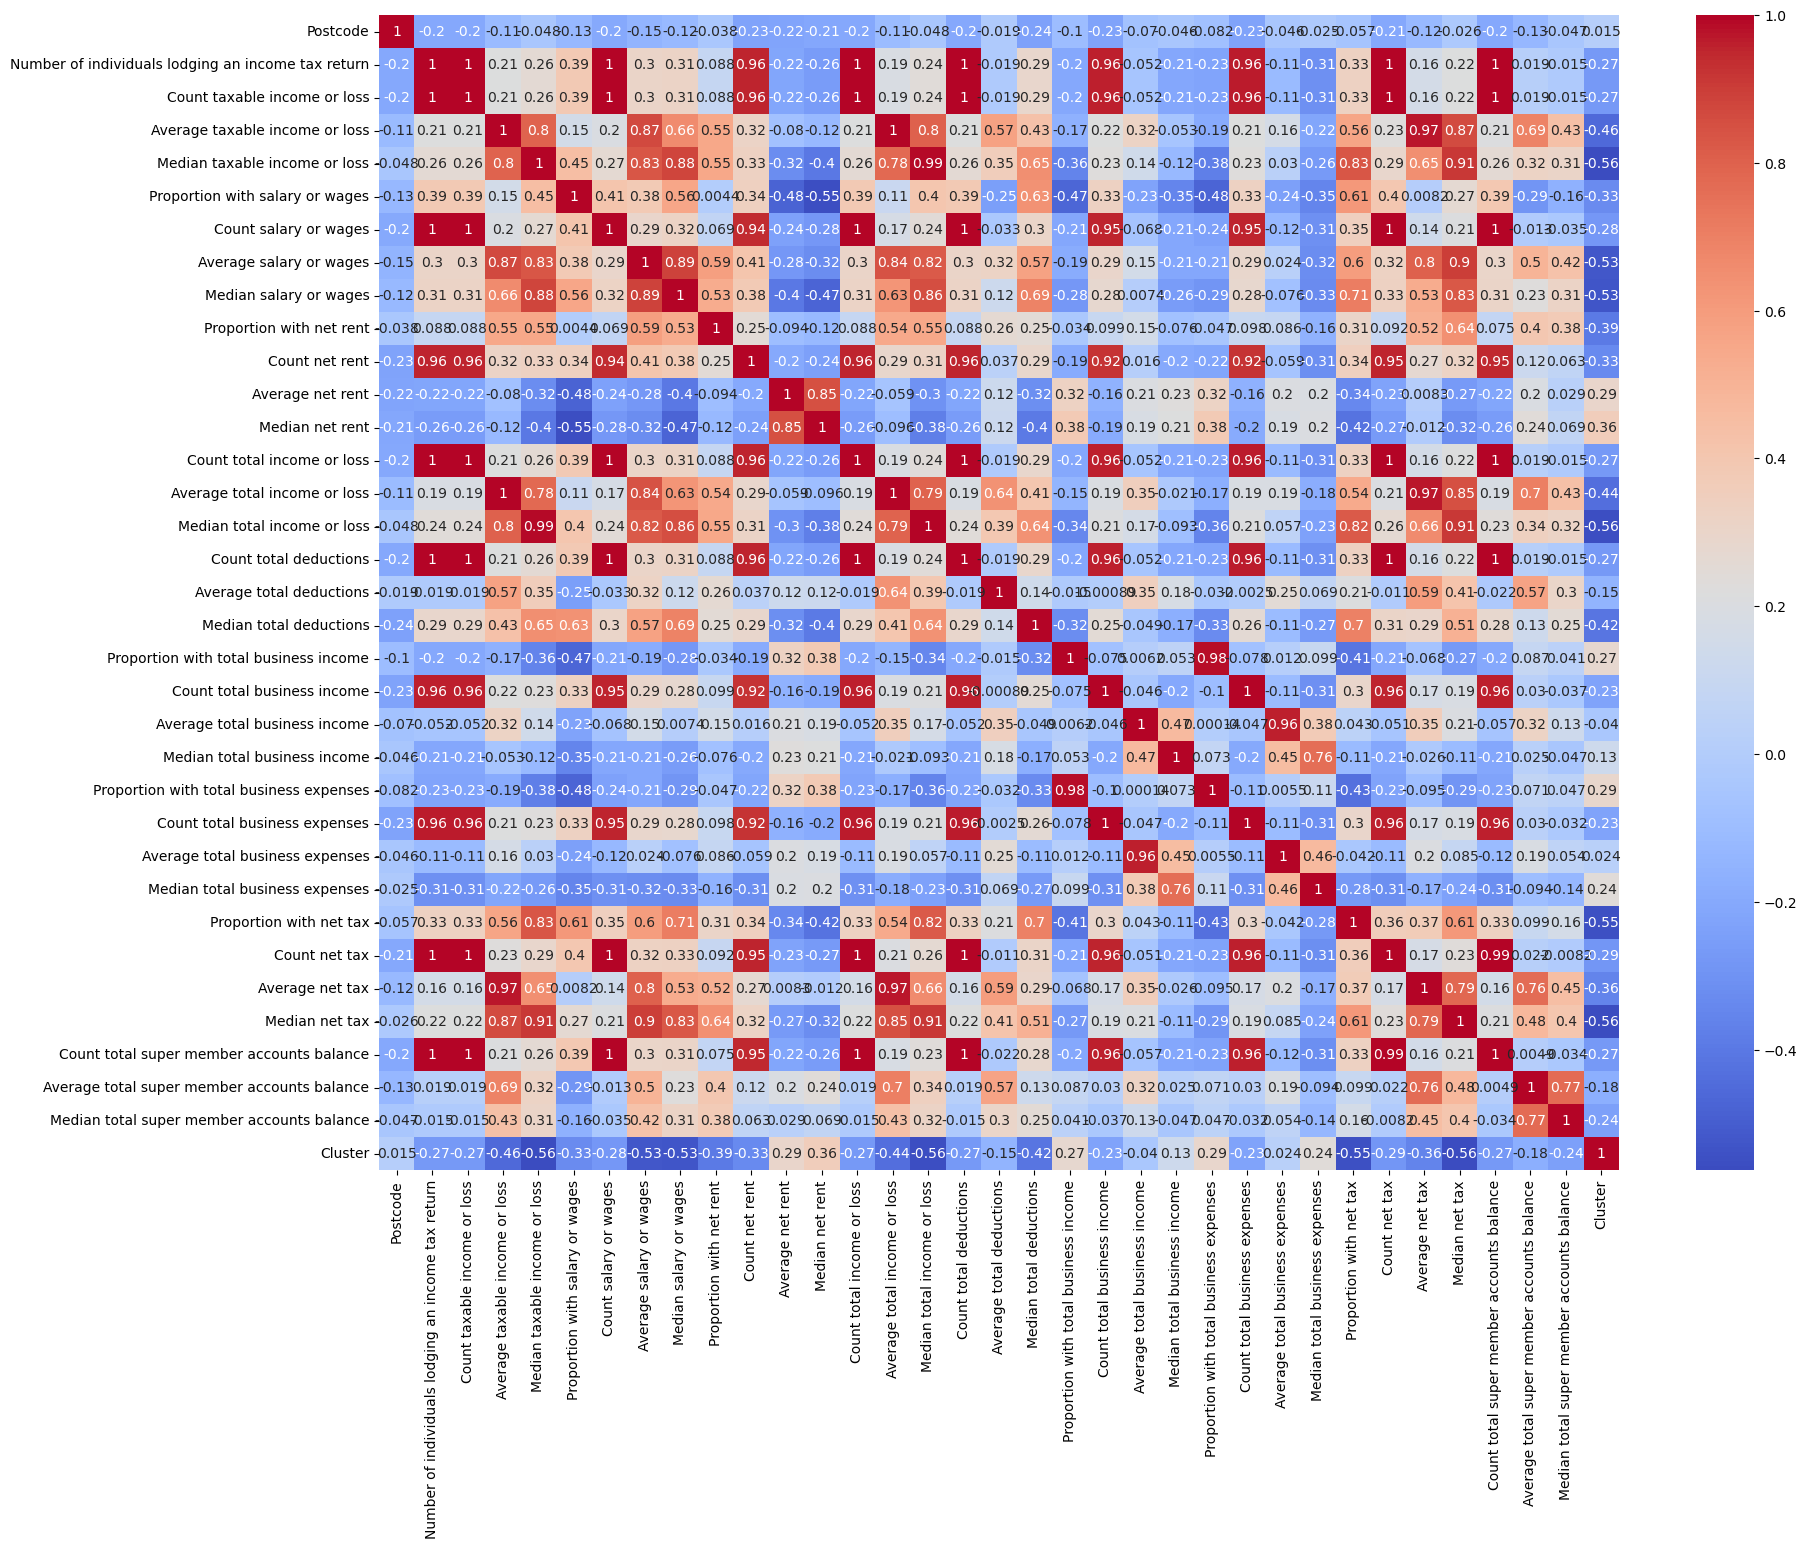

In [874]:
# use a heatmap to find out the top correlated features
plt.figure(figsize=(20 ,15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


In [866]:
#start off with selecting 5 main features to help predict the target.
features = ['Average salary or wages', 'Average net tax', 'Average total deductions', 
            'Average total super member accounts balance', 'Median taxable income or loss']
target = 'Average total income or loss'

X = data[features]
y = data[target]

# split into training and testing data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict the regression and use evaluation metrics
y_pred = reg.predict(X_test)
print(f" R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

 R2 Score: 0.9909168401450867
Mean Absolute Error: 1034.4296203525905
Mean Squared Error: 3342035.0531231873


The model achieved an $R^2$ Score of 0.99, meaning it explains 99% of the variance in total income, which suggests a very good fit. The MAE of 1034 shows the model's predictions are off by about $1,034, which is quite low considering the income ranges in the dataset.

In [868]:
#scale the data to help with RFE and reduce the features for optimal performance of the model
# with the least amount of features.
scaler = StandardScaler()
X_train_scalar = scaler.fit_transform(X_train)
X_test_scalar = scaler.transform(X_test)

# had to change the scalar sets into a dataframe to help with plotting
X_train_scalar = pd.DataFrame(X_train_scalar, columns=X_train.columns)
X_test_scalar = pd.DataFrame(X_test_scalar, columns=X_test.columns)

# arrays to keep track of the index and the r2 score at each index to help plot whiich amount of
#features is optimal
feature_tracker = []
r2_tracker = []

for selected_feature in range(1, len(X_train_scalar.columns) + 1):
    # Apply RFE with the current number of selected features
    rfe = RFE(estimator=reg, n_features_to_select=selected_feature)
    rfe.fit(X_train_scalar, y_train)
    
    y_test_pred_scalar = rfe.predict(X_test_scalar)
    
    # Store the number of features and performance metrics
    feature_tracker.append(selected_feature)
    r2_tracker.append(r2_score(y_test, y_test_pred_scalar))

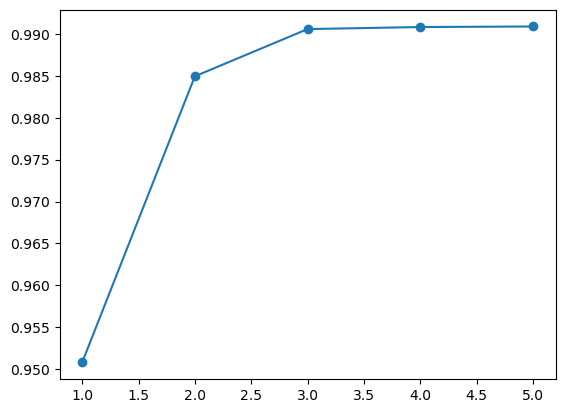

In [877]:
plt.plot(feature_tracker, r2_tracker, marker='o')

The plot / $R^2$ score flatlines at 3 after a minor increase in the metric going from 2 features to 3 features.
Using domain knowledge, I decide that the difference between 2 and 3 is negligible and i use 2 features to make my final model.


In [881]:
rfe_optimal = RFE(estimator=reg, n_features_to_select=2)
rfe_optimal.fit(X_train_scalar, y_train)

#the features the final model is based on
retained_features = X_train_scalar.columns[rfe_optimal.support_]
print(retained_features)

Index(['Average net tax', 'Median taxable income or loss'], dtype='object')


In [883]:
X_train_rfe = X_train_scalar[retained_features]
X_test_rfe = X_test_scalar[retained_features]

reg.fit(X_train_rfe, y_train)

y_pred_rfe = reg.predict(X_test_rfe)

print(f" R2 Score: {r2_score(y_test, y_pred_rfe)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rfe)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rfe)}")

 R2 Score: 0.9849654379052506
Mean Absolute Error: 1296.8077751215133
Mean Squared Error: 5531779.064950653


The MAE and $R^2$ score have decreased slightly in the final model from 0.99 to 0.98 but it is a really good fit nevertheless and we ended up simplifying the data massively and still get extremely acceptable results with a really efficient model.

##### Scatterplot to visualise the predicted vs actual values

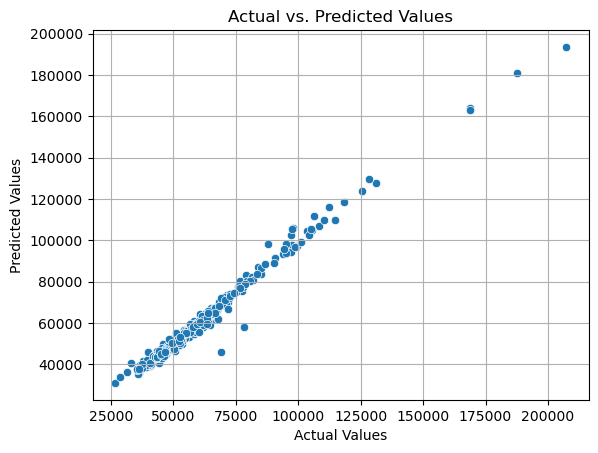

In [888]:
sns.scatterplot(x=y_test, y=y_pred_rfe)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)

The scatter plot shows a strong linear positive correlation between actual and predicted values, suggesting that the model performs well overall. However, the few points deviating significantly from the diagonal line suggest that the model struggles with higher income values, leading to over predictions.

##### Residual Plot

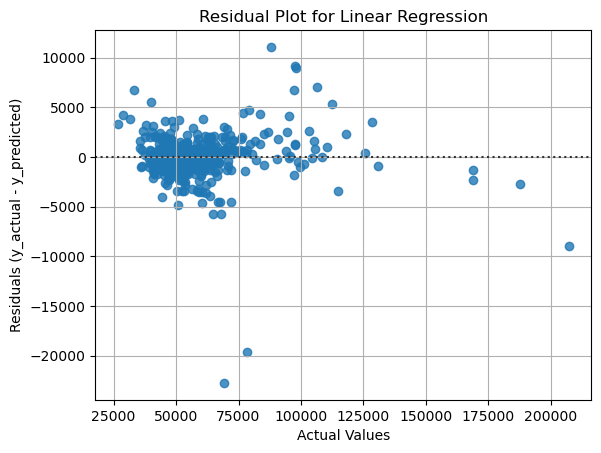

In [895]:
sns.residplot(x=y_test, y=y_pred_rfe)
plt.xlabel('Actual Values')
plt.ylabel('Residuals (y_actual - y_predicted)')
plt.title('Residual Plot for Linear Regression')
plt.grid(True)

The residual plot helps to visualize errors made by the model. In a good model, residuals should be randomly distributed around zero, indicating a good fit. The model above is randomly distributed around 0 as well showing that it is a good fit but again, it deviates from the dotted line when it reaches higher income values showing it has difficulty predicting higher incomes.